# 1 Configure the API Request

In [5]:
from __future__ import print_function
import gate_api
from gate_api.exceptions import ApiException, GateApiException
import pandas as pd
import time
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.dates as md

# Defining the host is optional and defaults to https://api.gateio.ws/api/v4
# See configuration.py for a list of all supported configuration parameters.
configuration = gate_api.Configuration(
    host = "https://api.gateio.ws/api/v4"
)

api_client = gate_api.ApiClient(configuration)
# Create an instance of the API class
api_instance = gate_api.SpotApi(api_client)

In C:\Users\Flo\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\Flo\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\Flo\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\Flo\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\Flo\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
Th

# 2 Define how to Handle the Response

In [8]:
def append_data(data, plot, ts):
#   print(data)
#   print(data.base_volume)
#   print(data.last)
#   print(data.currency_pair)

    symbol = data.currency_pair
    last_price = data.last
    volume = data.base_volume
    
    if plot == True:
        plot_price(ts, float(last_price))
    
    new_record = {
                  'Symbol': symbol, 
                  'Timestamp': ts, 
                  'Volume': volume, 
                  'Price': last_price
                 }
    return new_record

def plot_price(ts, price):
    datenums = float(md.date2num(ts))
    plt.scatter(datenums, price, color='blue')
    
def request_data(currency_pair, s, plot):
    i = 0
    df = pd.DataFrame(columns=['Symbol', 'Timestamp', 'Volume', 'Price'])
    while i < 5: 
        try:
            # Retrieve ticker information
            api_response = api_instance.list_tickers(currency_pair=currency_pair)
            #print(api_response)
            length = len(api_response)
            ts = dt.datetime.now()
            if length > 10:
                length = 10
            for s in range(0, length):
                if 'USDT' in api_response[s].currency_pair:
                    print(f'{api_response[s].currency_pair}: {api_response[s].last}')
                    record = append_data(api_response[s], plot, ts)
                df = df.append(record, ignore_index=True)
                    
        except GateApiException as ex:
            print("Gate api exception, label: %s, message: %s\n" % (ex.label, ex.message))
        except ApiException as e:
            print("Exception when calling SpotApi->list_tickers: %s\n" % e)
        time.sleep(s)
        i = i + 1
    return df

# 3 Request Prices for a Single Symbol

BTC_USDT: 56629.48
BTC_USDT: 56629.48
BTC_USDT: 56629.48
BTC_USDT: 56629.48
BTC_USDT: 56629.48


,Symbol,Timestamp,Volume,Price
0,BTC_USDT,2021-05-11 23:21:15.708089,3611.0757556824,56629.48
1,BTC_USDT,2021-05-11 23:21:15.980648,3611.0757556824,56629.48
2,BTC_USDT,2021-05-11 23:21:16.240158,3611.0757556824,56629.48
3,BTC_USDT,2021-05-11 23:21:16.502232,3611.0757556824,56629.48
4,BTC_USDT,2021-05-11 23:21:16.762234,3611.0757556824,56629.48


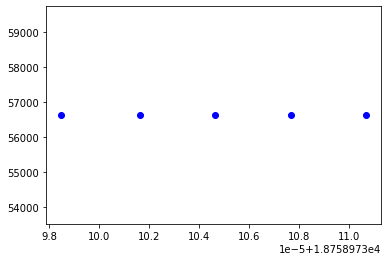

In [9]:
# interval in seconds
s = 1
plot = True
currency_pair = 'BTC_USDT' #Currency pair (optional)
df = request_data(currency_pair, s, plot)
df

# 4 Request Prices for all USDT Symbols

In [10]:
# interval in seconds
s = 1
currency_pair = '' #Currency pair (optional)
plot = False
df = request_data(currency_pair, s, plot)
df

MKR3S_USDT: 0.03849
BANK_USDT: 588.49
COOK_USDT: 0.06875
EXRD_USDT: 0.1322
HPB_USDT: 0.34347
MKR3S_USDT: 0.03849
BANK_USDT: 588.49
COOK_USDT: 0.06875
EXRD_USDT: 0.1322
HPB_USDT: 0.34501
MKR3S_USDT: 0.03849
BANK_USDT: 588.49
COOK_USDT: 0.06997
EXRD_USDT: 0.1322
HPB_USDT: 0.34501
FIS_USDT: 2.642
SNT_USDT: 0.19168
LTC3L_USDT: 0.7006
LSK_USDT: 8.922
VET_USDT: 0.20928
EDG_USDT: 0.02617
FIS_USDT: 2.642
SNT_USDT: 0.19168
LTC3L_USDT: 0.7006
LSK_USDT: 8.922
VET_USDT: 0.20928
EDG_USDT: 0.02616


,Symbol,Timestamp,Volume,Price
0,MKR3S_USDT,2021-05-11 23:21:20.800490,362058.96673256,0.03849
1,MKR3S_USDT,2021-05-11 23:21:20.800490,362058.96673256,0.03849
2,BANK_USDT,2021-05-11 23:21:20.800490,313.96023327,588.49
3,COOK_USDT,2021-05-11 23:21:20.800490,14954611.089543,0.06875
4,COOK_USDT,2021-05-11 23:21:20.800490,14954611.089543,0.06875
5,COOK_USDT,2021-05-11 23:21:20.800490,14954611.089543,0.06875
6,EXRD_USDT,2021-05-11 23:21:20.800490,1050579.351722,0.1322
7,HPB_USDT,2021-05-11 23:21:20.800490,1662551.0505534,0.34347
8,HPB_USDT,2021-05-11 23:21:20.800490,1662551.0505534,0.34347
9,HPB_USDT,2021-05-11 23:21:20.800490,1662551.0505534,0.34347
